In [122]:
from rdkit import rdBase
rdBase.rdkitVersion

'2019.03.1'

In [123]:
import glob
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import rdFMCS
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools

import pandas as pd
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt

In [124]:
path_to_library = '../FragmentLibrary'

# list of folders for each subpocket
folders = glob.glob(path_to_library+'/*')
subpockets = [folder[-2:] for folder in folders]
subpockets

['FP', 'B2', 'AP', 'SE', 'B1', 'GA']

In [125]:
# read data

data = pd.DataFrame()

rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)

# iterate over subpockets
for i, folder in enumerate(folders):
    
    subpocket = subpockets[i]
    
    file = folder+'/'+subpocket+'.sdf' 
    df = PandasTools.LoadSDF(file, embedProps=False)
        
    fragments = []
    fingerprints = []
    smiles = []

    for frag in df.ROMol:
        # remove dummy atoms from fragments and create smiles
        du = Chem.MolFromSmiles('*')
        h = Chem.MolFromSmiles('[H]', sanitize=False)
        fixed_frag = AllChem.ReplaceSubstructs(frag, du, h, replaceAll=True)[0]
        fixed_frag = Chem.RemoveHs(fixed_frag)
        # 2D coordinates
        tmp = AllChem.Compute2DCoords(fixed_frag)
        fragments.append(fixed_frag)
        # smiles for drawing fragment
        smiles.append(Chem.MolToSmiles(fixed_frag))
        # fingerprint of fragment
        fingerprints.append(rdkit_gen.GetFingerprint(fixed_frag))
     
    df['smiles'] = smiles
    df['fragment'] = fragments
    df['fingerprint'] = fingerprints
    df['subpocket'] = subpocket
    
    data = data.append(df)
    
data = data.reset_index(drop=True)
data.shape

RDKit ERROR: [14:04:03] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:36] Unexpected error hit on line 56
RDKit ERROR: [14:12:36] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:36] Unexpected error hit on line 119
RDKit ERROR: [14:12:36] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:36] 
RDKit ERR

RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:37] Unexpected error hit on line 14961
RDKit ERROR: [14:12:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:37] Unexpected error hit on line 15036
RDKit ERROR: [14:12:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1

RDKit ERROR: [14:12:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:37] Unexpected error hit on line 30715
RDKit ERROR: [14:12:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:37] Unexpected error hit on line 30781
RDKit ERROR: [14:12:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:37] 
RDKi

RDKit ERROR: [14:12:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:37] Unexpected error hit on line 46307
RDKit ERROR: [14:12:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:37] Unexpected error hit on line 46365
RDKit ERROR: [14:12:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:37] 
RDKit 

RDKit ERROR: [14:12:37] Unexpected error hit on line 63438
RDKit ERROR: [14:12:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:37] Unexpected error hit on line 63543
RDKit ERROR: [14:12:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:37] Unexpected error hit on line 63652
RDKit ERROR: [14:12:37] ERROR: moving to th

RDKit ERROR: [14:12:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:37] Unexpected error hit on line 81610
RDKit ERROR: [14:12:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:37] Unexpected error hit on line 81665
RDKit ERROR: [14:12:37] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit E

RDKit ERROR: [14:12:38] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 20 < 20
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:38] Unexpected error hit on line 97990
RDKit ERROR: [14:12:38] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:38] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:38] Unexpected error hit on line 98091
RDKit ERROR: [14:12:38] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:38] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: [14:12:38] Unexpected error hit on line 115369
RDKit ERROR: [14:12:38] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:38] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:38] Unexpected error hit on line 115436
RDKit ERROR: [14:12:38] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:38] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:38] Unexpected error hit on line 115522
RDKit ERROR: [14:12:38] ERROR: moving to

RDKit ERROR: [14:12:38] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:40] Unexpected error hit on line 47
RDKit ERROR: [14:12:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:40] Unexpected error hit on line 102
RDKit ERROR: [14:12:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:40] 
RDKit ERROR

RDKit ERROR: [14:12:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:40] Unexpected error hit on line 65
RDKit ERROR: [14:12:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:40] Unexpected error hit on line 129
RDKit ERROR: [14:12:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:40] 
RDKit E

RDKit ERROR: [14:12:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:40] Unexpected error hit on line 15173
RDKit ERROR: [14:12:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:40] Unexpected error hit on line 15234
RDKit ERROR: [14:12:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:40] 
RD

RDKit ERROR: [14:12:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:40] Unexpected error hit on line 31170
RDKit ERROR: [14:12:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:40] Unexpected error hit on line 31229
RDKit ERROR: [14:12:40] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: [14:12:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:41] Unexpected error hit on line 47150
RDKit ERROR: [14:12:41] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:41] Unexpected error hit on line 47235
RDKit ERROR: [14:12:41] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 21 < 21
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:41] Unexpected error hit on line 64027
RDKit ERROR: [14:12:41] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 22 < 22
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:41] Unexpected error hit on line 64122
RDKit ERROR: [14:12:41] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1

RDKit ERROR: [14:12:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:41] Unexpected error hit on line 80179
RDKit ERROR: [14:12:41] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:41] Unexpected error hit on line 80234
RDKit ERROR: [14:12:41] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: [14:12:41] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:41] Unexpected error hit on line 95607
RDKit ERROR: [14:12:41] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 21 < 21
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:41] Unexpected error hit on line 95704
RDKit ERROR: [14:12:41] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:41] 
RD

RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:42] Unexpected error hit on line 112133
RDKit ERROR: [14:12:42] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:42] Unexpected error hit on line 112197
RDKit ERROR: [14:12:42] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/

RDKit ERROR: [14:12:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:42] Unexpected error hit on line 127797
RDKit ERROR: [14:12:42] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:42] Unexpected error hit on line 127871
RDKit ERROR: [14:12:42] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
R

RDKit ERROR: [14:12:42] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:42] Unexpected error hit on line 144340
RDKit ERROR: [14:12:42] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:42] Unexpected error hit on line 144395
RDKit ERROR: [14:12:42] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:42] 
RD

RDKit ERROR: [14:12:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:42] Unexpected error hit on line 160808
RDKit ERROR: [14:12:42] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:42] Unexpected error hit on line 160874
RDKit ERROR: [14:12:42] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
R

RDKit ERROR: [14:12:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:42] Unexpected error hit on line 177589
RDKit ERROR: [14:12:42] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:42] Unexpected error hit on line 177667
RDKit ERROR: [14:12:42] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: [14:12:42] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:45] Unexpected error hit on line 56
RDKit ERROR: [14:12:45] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:45] Unexpected error hit on line 169
RDKit ERROR: [14:12:45] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:45] 
RDKit ERR

RDKit ERROR: [14:12:45] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:45] Unexpected error hit on line 16789
RDKit ERROR: [14:12:45] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:45] Unexpected error hit on line 16852
RDKit ERROR: [14:12:45] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:45] 
RDKi

RDKit ERROR: [14:12:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:46] Unexpected error hit on line 34985
RDKit ERROR: [14:12:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:46] Unexpected error hit on line 35078
RDKit ERROR: [14:12:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:46] 
RD

RDKit ERROR: [14:12:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:46] Unexpected error hit on line 52691
RDKit ERROR: [14:12:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:46] Unexpected error hit on line 52746
RDKit ERROR: [14:12:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit E

RDKit ERROR: [14:12:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:46] Unexpected error hit on line 70280
RDKit ERROR: [14:12:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:46] Unexpected error hit on line 70337
RDKit ERROR: [14:12:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:46] 
RDKi

RDKit ERROR: [14:12:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:46] Unexpected error hit on line 87585
RDKit ERROR: [14:12:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:46] Unexpected error hit on line 87648
RDKit ERROR: [14:12:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: [14:12:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:46] Unexpected error hit on line 105304
RDKit ERROR: [14:12:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:46] Unexpected error hit on line 105359
RDKit ERROR: [14:12:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:46] 
RD

RDKit ERROR: [14:12:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:48] Unexpected error hit on line 54
RDKit ERROR: [14:12:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:48] Unexpected error hit on line 121
RDKit ERROR: [14:12:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:48] 
RDKit ERROR

RDKit ERROR: [14:12:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:48] Unexpected error hit on line 431
RDKit ERROR: [14:12:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:48] Unexpected error hit on line 484
RDKit ERROR: [14:12:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR

RDKit ERROR: [14:12:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:48] Unexpected error hit on line 15736
RDKit ERROR: [14:12:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:48] Unexpected error hit on line 15798
RDKit ERROR: [14:12:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: [14:12:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:48] Unexpected error hit on line 31310
RDKit ERROR: [14:12:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:48] Unexpected error hit on line 31461
RDKit ERROR: [14:12:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:48] 
RD

RDKit ERROR: [14:12:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:49] Unexpected error hit on line 46011
RDKit ERROR: [14:12:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:49] Unexpected error hit on line 46064
RDKit ERROR: [14:12:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:49] 
RDKit 

RDKit ERROR: [14:12:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:49] Unexpected error hit on line 61385
RDKit ERROR: [14:12:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1555007059585/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:49] Unexpected error hit on line 61448
RDKit ERROR: [14:12:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:12:49] 
RD

(7480, 14)

In [126]:
df_AP = data[data.subpocket=='AP']
df_FP = data[data.subpocket=='FP']
df_SE = data[data.subpocket=='SE']
df_GA = data[data.subpocket=='GA']
df_B1 = data[data.subpocket=='B1']
df_B2 = data[data.subpocket=='B2']

Functions needed for Clustering:

In [127]:
# Calculate distance matrix for fingerprint list
def Tanimoto_distance_matrix(fp_list):
    fp_list = list(fp_list)
    dissimilarity_matrix = []
    for i in range(1,len(fp_list)):
        similarities = DataStructs.BulkTanimotoSimilarity(fp_list[i],fp_list[:i])
        # Since we need a distance matrix, calculate 1-x for every element in similarity matrix
        dissimilarity_matrix.extend([1-x for x in similarities])
    return dissimilarity_matrix

In [128]:
# Input: Fingerprints and a threshold for the clustering
def ClusterFps(fps, cutoff=0.2):
    # Calculate Tanimoto distance matrix
    distance_matr = Tanimoto_distance_matrix(fps)
    # Now cluster the data with the implemented Butina algorithm:
    clusters = Butina.ClusterData(distance_matr,len(fps),cutoff,isDistData=True)
    return clusters

In [129]:
def analyze_clusters(clusters, subpocket, cutoff):
    
    # Give a short report about the numbers of clusters and their sizes
    num_clust_g1 = len([c for c in clusters if len(c) == 1])
    num_clust_g5 = len([c for c in clusters if len(c) > 5])
    num_clust_g25 = len([c for c in clusters if len(c) > 25])
    num_clust_g100 = len([c for c in clusters if len(c) > 100])

    print(subpocket)
    print("Threshold: ", cutoff)
    print("total # clusters: ", len(clusters))
    print("# clusters with only 1 compound: ", num_clust_g1)
    print("# clusters with >5 compounds: ", num_clust_g5)
    print("# clusters with >25 compounds: ", num_clust_g25)
    print("# clusters with >100 compounds: ", num_clust_g100)

    # Plot the size of the clusters
    fig = plt.figure(1, figsize=(8, 3))
    plt1 = plt.subplot(111)
    plt.axis([0, len(clusters), 0, len(clusters[0])+1])
    plt.xlabel('Cluster index', fontsize=20)
    plt.ylabel('Number of molecules', fontsize=20)
    plt.tick_params(labelsize=16)
    plt.title('Threshold: '+str('%3.1f' %cutoff), fontsize=10)
    plt1.bar(range(1, len(clusters)), [len(c) for c in clusters[:len(clusters)-1]], lw=0)
    plt.show()

    return


## Butina Clustering for each subpocket with different cutoffs:

AP
Threshold:  0.0
total # clusters:  1200
# clusters with only 1 compound:  819
# clusters with >5 compounds:  78
# clusters with >25 compounds:  6
# clusters with >100 compounds:  0


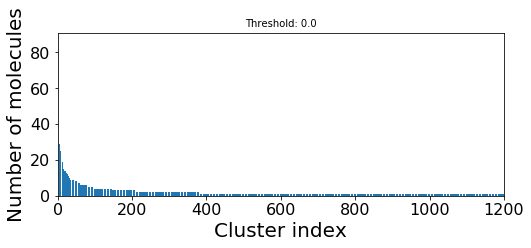

AP
Threshold:  0.1
total # clusters:  1123
# clusters with only 1 compound:  737
# clusters with >5 compounds:  89
# clusters with >25 compounds:  6
# clusters with >100 compounds:  0


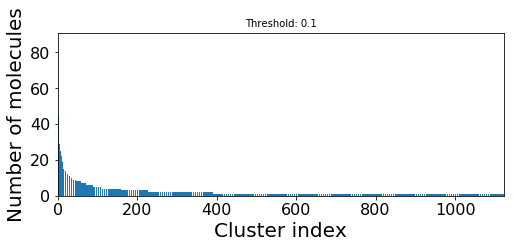

AP
Threshold:  0.2
total # clusters:  920
# clusters with only 1 compound:  562
# clusters with >5 compounds:  99
# clusters with >25 compounds:  8
# clusters with >100 compounds:  0


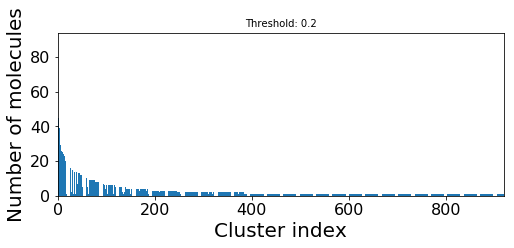

AP
Threshold:  0.30000000000000004
total # clusters:  729
# clusters with only 1 compound:  412
# clusters with >5 compounds:  96
# clusters with >25 compounds:  12
# clusters with >100 compounds:  1


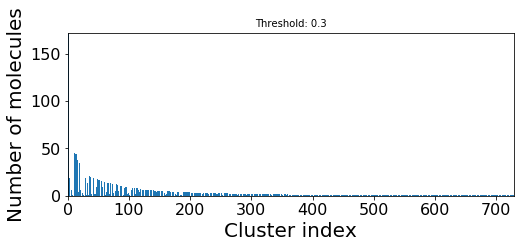

AP
Threshold:  0.4
total # clusters:  562
# clusters with only 1 compound:  297
# clusters with >5 compounds:  96
# clusters with >25 compounds:  18
# clusters with >100 compounds:  1


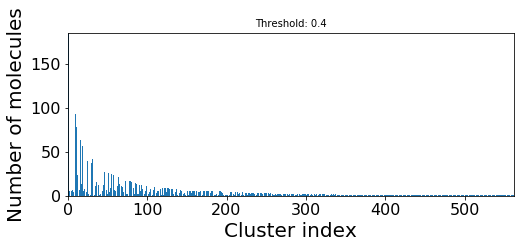

AP
Threshold:  0.5
total # clusters:  392
# clusters with only 1 compound:  182
# clusters with >5 compounds:  84
# clusters with >25 compounds:  18
# clusters with >100 compounds:  5


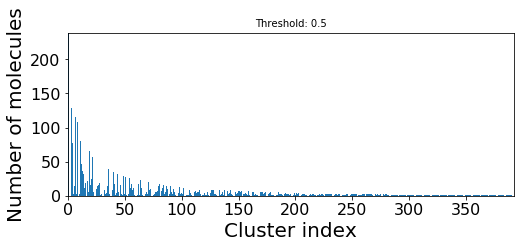

AP
Threshold:  0.6000000000000001
total # clusters:  230
# clusters with only 1 compound:  93
# clusters with >5 compounds:  66
# clusters with >25 compounds:  20
# clusters with >100 compounds:  5


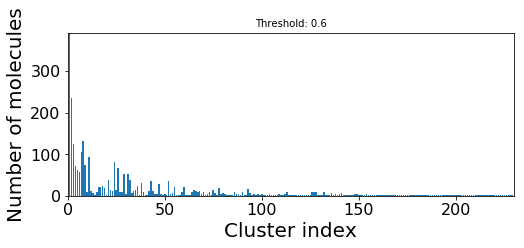

AP
Threshold:  0.7000000000000001
total # clusters:  122
# clusters with only 1 compound:  45
# clusters with >5 compounds:  45
# clusters with >25 compounds:  19
# clusters with >100 compounds:  3


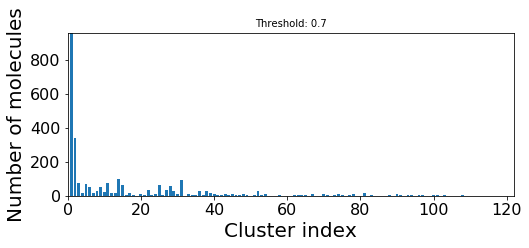

AP
Threshold:  0.8
total # clusters:  44
# clusters with only 1 compound:  12
# clusters with >5 compounds:  16
# clusters with >25 compounds:  8
# clusters with >100 compounds:  4


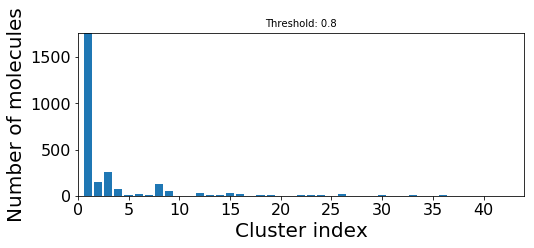

AP
Threshold:  0.9
total # clusters:  11
# clusters with only 1 compound:  2
# clusters with >5 compounds:  6
# clusters with >25 compounds:  2
# clusters with >100 compounds:  1


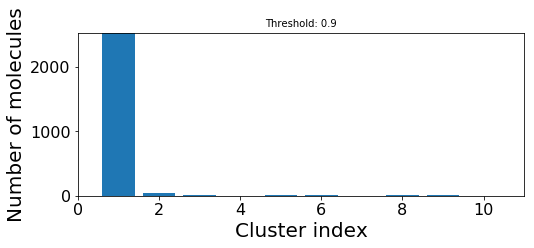

In [130]:
# cluster adenine pocket
fps = df_AP.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'AP', cutoff=i)

FP
Threshold:  0.0
total # clusters:  780
# clusters with only 1 compound:  526
# clusters with >5 compounds:  57
# clusters with >25 compounds:  3
# clusters with >100 compounds:  0


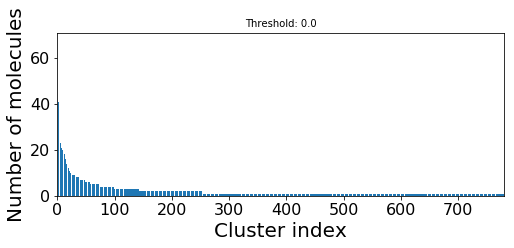

FP
Threshold:  0.1
total # clusters:  753
# clusters with only 1 compound:  494
# clusters with >5 compounds:  58
# clusters with >25 compounds:  3
# clusters with >100 compounds:  0


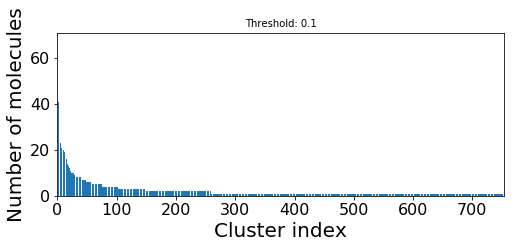

FP
Threshold:  0.2
total # clusters:  684
# clusters with only 1 compound:  419
# clusters with >5 compounds:  65
# clusters with >25 compounds:  4
# clusters with >100 compounds:  0


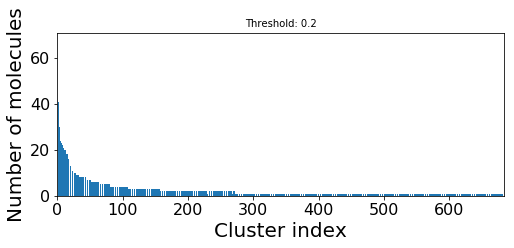

FP
Threshold:  0.30000000000000004
total # clusters:  566
# clusters with only 1 compound:  313
# clusters with >5 compounds:  61
# clusters with >25 compounds:  11
# clusters with >100 compounds:  0


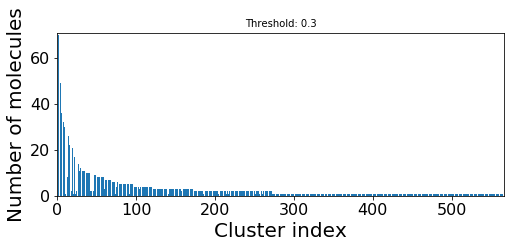

FP
Threshold:  0.4
total # clusters:  441
# clusters with only 1 compound:  215
# clusters with >5 compounds:  67
# clusters with >25 compounds:  11
# clusters with >100 compounds:  0


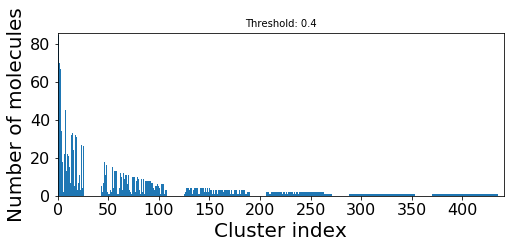

FP
Threshold:  0.5
total # clusters:  306
# clusters with only 1 compound:  136
# clusters with >5 compounds:  62
# clusters with >25 compounds:  13
# clusters with >100 compounds:  2


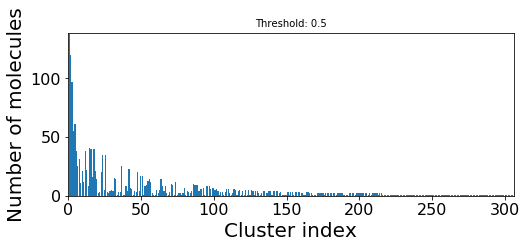

FP
Threshold:  0.6000000000000001
total # clusters:  221
# clusters with only 1 compound:  79
# clusters with >5 compounds:  57
# clusters with >25 compounds:  16
# clusters with >100 compounds:  3


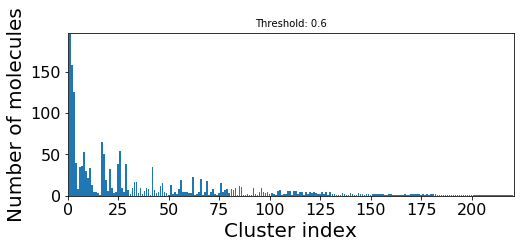

FP
Threshold:  0.7000000000000001
total # clusters:  108
# clusters with only 1 compound:  27
# clusters with >5 compounds:  48
# clusters with >25 compounds:  13
# clusters with >100 compounds:  4


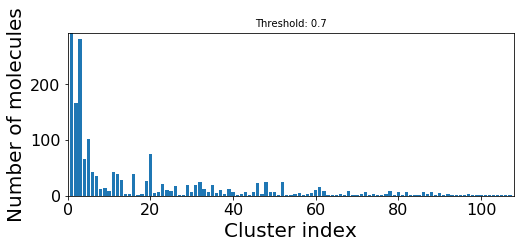

FP
Threshold:  0.8
total # clusters:  50
# clusters with only 1 compound:  9
# clusters with >5 compounds:  25
# clusters with >25 compounds:  8
# clusters with >100 compounds:  5


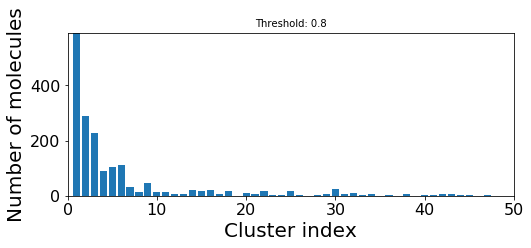

FP
Threshold:  0.9
total # clusters:  15
# clusters with only 1 compound:  3
# clusters with >5 compounds:  8
# clusters with >25 compounds:  4
# clusters with >100 compounds:  2


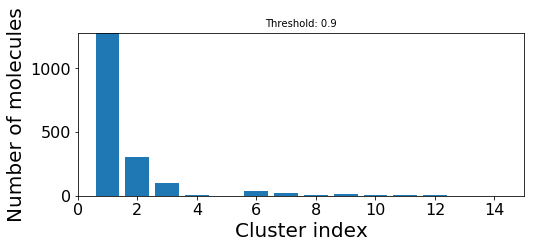

In [131]:
# cluster front pocket
fps = df_FP.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'FP', cutoff=i)

SE
Threshold:  0.0
total # clusters:  608
# clusters with only 1 compound:  406
# clusters with >5 compounds:  46
# clusters with >25 compounds:  4
# clusters with >100 compounds:  0


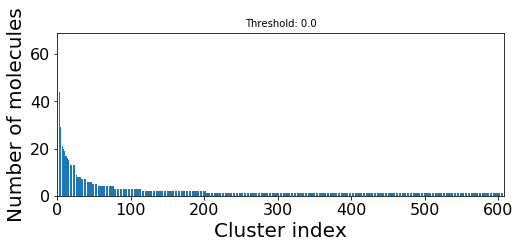

SE
Threshold:  0.1
total # clusters:  576
# clusters with only 1 compound:  376
# clusters with >5 compounds:  46
# clusters with >25 compounds:  4
# clusters with >100 compounds:  0


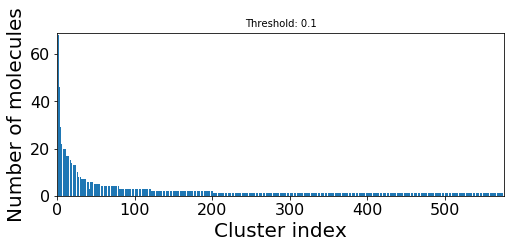

SE
Threshold:  0.2
total # clusters:  492
# clusters with only 1 compound:  302
# clusters with >5 compounds:  51
# clusters with >25 compounds:  5
# clusters with >100 compounds:  0


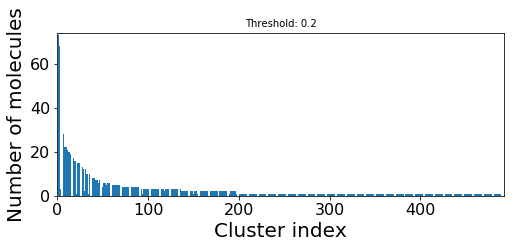

SE
Threshold:  0.30000000000000004
total # clusters:  410
# clusters with only 1 compound:  236
# clusters with >5 compounds:  49
# clusters with >25 compounds:  7
# clusters with >100 compounds:  0


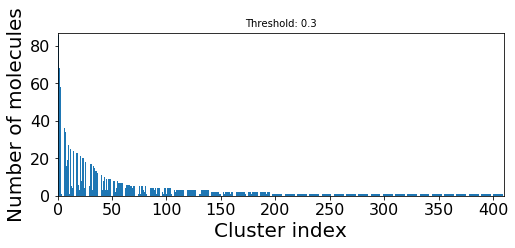

SE
Threshold:  0.4
total # clusters:  307
# clusters with only 1 compound:  157
# clusters with >5 compounds:  50
# clusters with >25 compounds:  13
# clusters with >100 compounds:  1


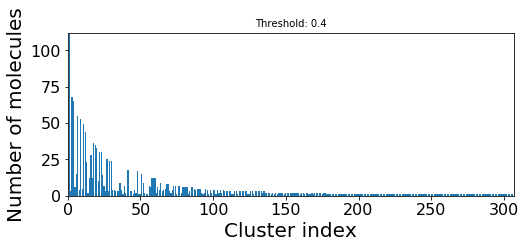

SE
Threshold:  0.5
total # clusters:  213
# clusters with only 1 compound:  90
# clusters with >5 compounds:  43
# clusters with >25 compounds:  14
# clusters with >100 compounds:  2


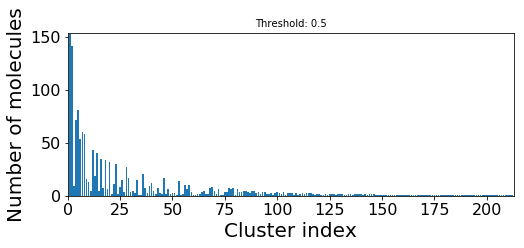

SE
Threshold:  0.6000000000000001
total # clusters:  149
# clusters with only 1 compound:  59
# clusters with >5 compounds:  40
# clusters with >25 compounds:  13
# clusters with >100 compounds:  3


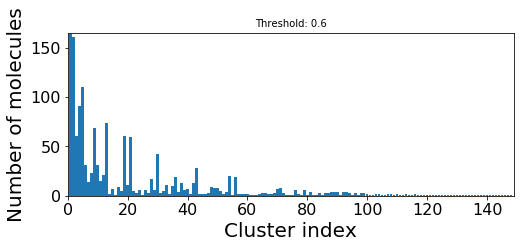

SE
Threshold:  0.7000000000000001
total # clusters:  87
# clusters with only 1 compound:  30
# clusters with >5 compounds:  27
# clusters with >25 compounds:  14
# clusters with >100 compounds:  4


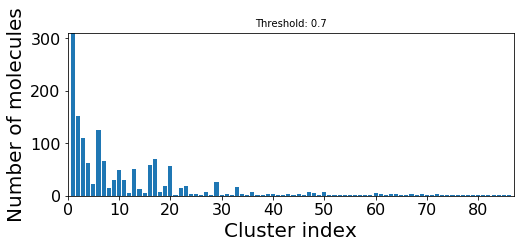

SE
Threshold:  0.8
total # clusters:  39
# clusters with only 1 compound:  7
# clusters with >5 compounds:  18
# clusters with >25 compounds:  10
# clusters with >100 compounds:  4


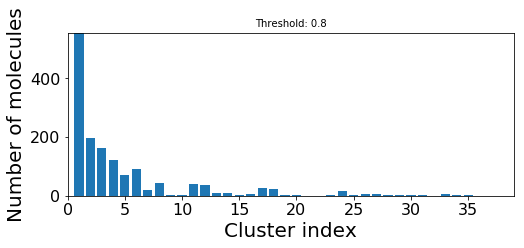

SE
Threshold:  0.9
total # clusters:  14
# clusters with only 1 compound:  3
# clusters with >5 compounds:  6
# clusters with >25 compounds:  6
# clusters with >100 compounds:  1


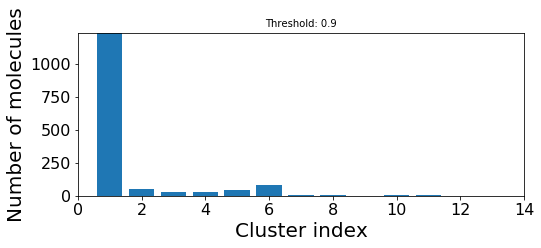

In [132]:
# cluster solvent exposed pocket
fps = df_SE.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'SE', cutoff=i)

GA
Threshold:  0.0
total # clusters:  424
# clusters with only 1 compound:  264
# clusters with >5 compounds:  43
# clusters with >25 compounds:  5
# clusters with >100 compounds:  0


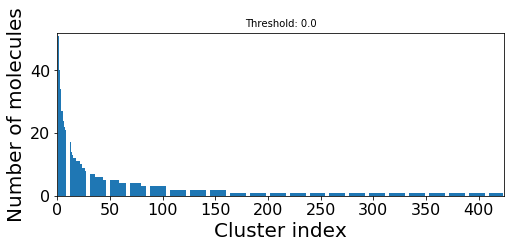

GA
Threshold:  0.1
total # clusters:  414
# clusters with only 1 compound:  250
# clusters with >5 compounds:  44
# clusters with >25 compounds:  5
# clusters with >100 compounds:  0


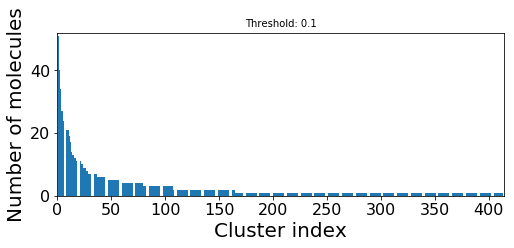

GA
Threshold:  0.2
total # clusters:  359
# clusters with only 1 compound:  205
# clusters with >5 compounds:  49
# clusters with >25 compounds:  6
# clusters with >100 compounds:  0


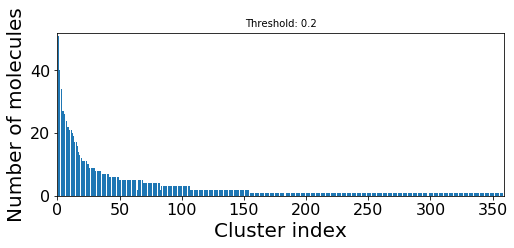

GA
Threshold:  0.30000000000000004
total # clusters:  299
# clusters with only 1 compound:  161
# clusters with >5 compounds:  48
# clusters with >25 compounds:  11
# clusters with >100 compounds:  0


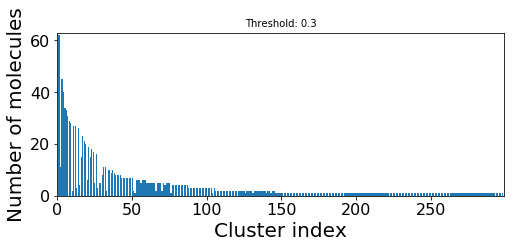

GA
Threshold:  0.4
total # clusters:  243
# clusters with only 1 compound:  120
# clusters with >5 compounds:  50
# clusters with >25 compounds:  9
# clusters with >100 compounds:  1


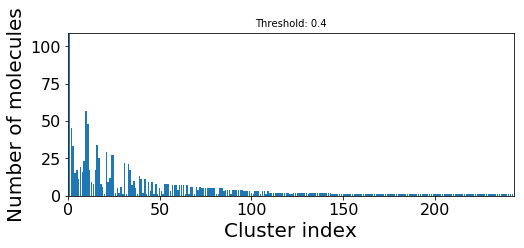

GA
Threshold:  0.5
total # clusters:  180
# clusters with only 1 compound:  85
# clusters with >5 compounds:  36
# clusters with >25 compounds:  12
# clusters with >100 compounds:  1


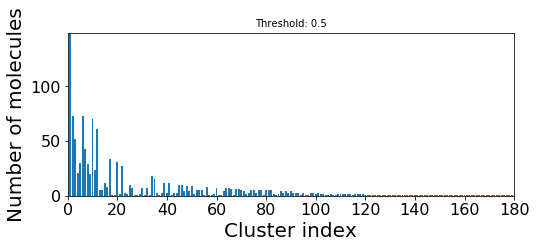

GA
Threshold:  0.6000000000000001
total # clusters:  118
# clusters with only 1 compound:  50
# clusters with >5 compounds:  36
# clusters with >25 compounds:  10
# clusters with >100 compounds:  2


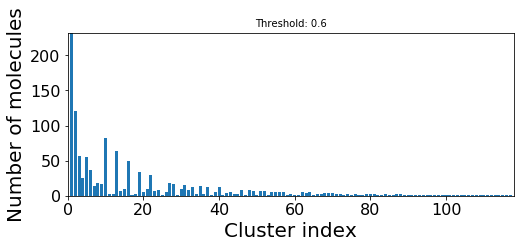

GA
Threshold:  0.7000000000000001
total # clusters:  77
# clusters with only 1 compound:  24
# clusters with >5 compounds:  28
# clusters with >25 compounds:  9
# clusters with >100 compounds:  3


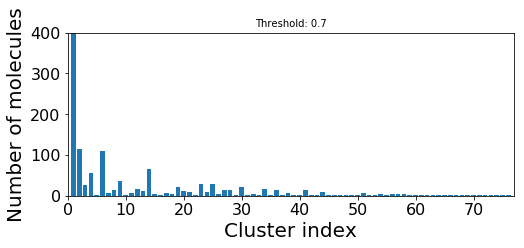

GA
Threshold:  0.8
total # clusters:  35
# clusters with only 1 compound:  5
# clusters with >5 compounds:  21
# clusters with >25 compounds:  8
# clusters with >100 compounds:  3


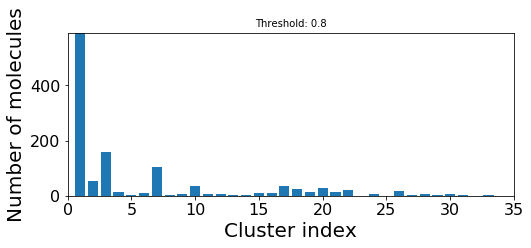

GA
Threshold:  0.9
total # clusters:  11
# clusters with only 1 compound:  1
# clusters with >5 compounds:  8
# clusters with >25 compounds:  4
# clusters with >100 compounds:  1


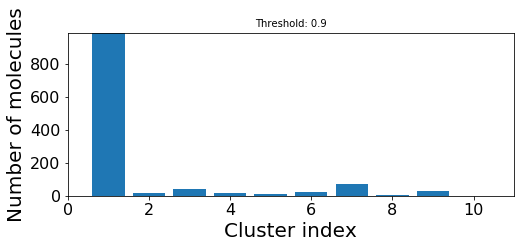

In [133]:
# cluster gate area
fps = df_GA.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'GA', cutoff=i)

B1
Threshold:  0.0
total # clusters:  54
# clusters with only 1 compound:  39
# clusters with >5 compounds:  2
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


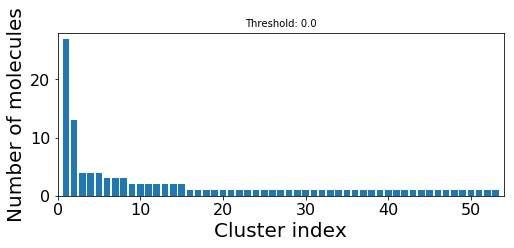

B1
Threshold:  0.1
total # clusters:  54
# clusters with only 1 compound:  39
# clusters with >5 compounds:  2
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


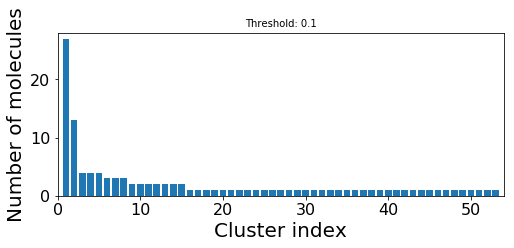

B1
Threshold:  0.2
total # clusters:  52
# clusters with only 1 compound:  36
# clusters with >5 compounds:  2
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


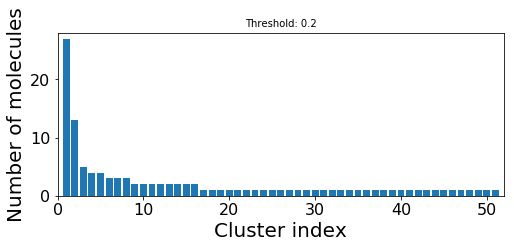

B1
Threshold:  0.30000000000000004
total # clusters:  47
# clusters with only 1 compound:  27
# clusters with >5 compounds:  2
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


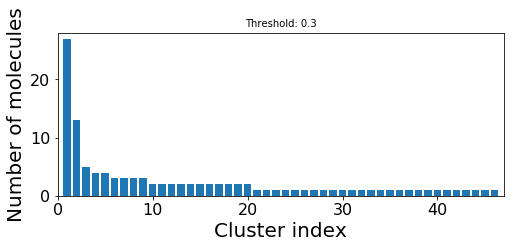

B1
Threshold:  0.4
total # clusters:  40
# clusters with only 1 compound:  24
# clusters with >5 compounds:  5
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


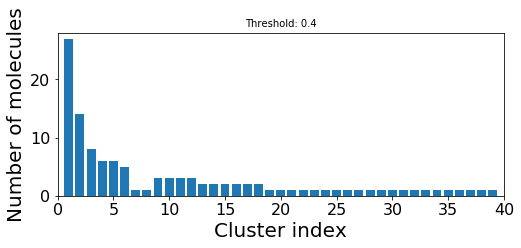

B1
Threshold:  0.5
total # clusters:  33
# clusters with only 1 compound:  18
# clusters with >5 compounds:  5
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


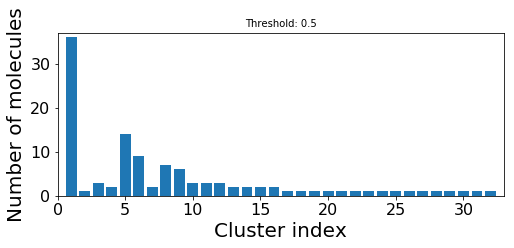

B1
Threshold:  0.6000000000000001
total # clusters:  31
# clusters with only 1 compound:  16
# clusters with >5 compounds:  4
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


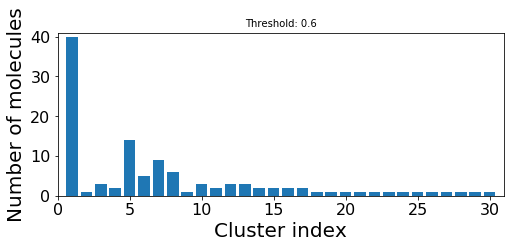

B1
Threshold:  0.7000000000000001
total # clusters:  22
# clusters with only 1 compound:  12
# clusters with >5 compounds:  4
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


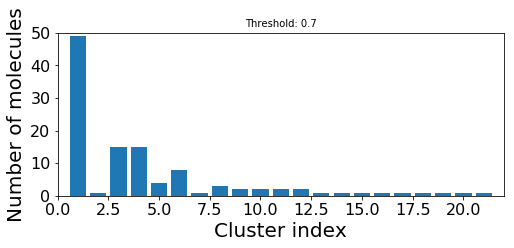

B1
Threshold:  0.8
total # clusters:  18
# clusters with only 1 compound:  6
# clusters with >5 compounds:  4
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


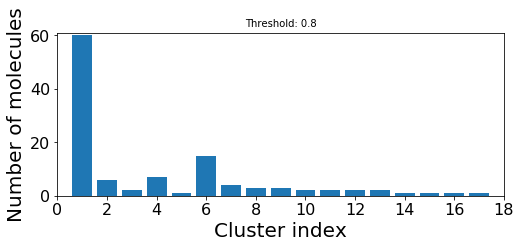

B1
Threshold:  0.9
total # clusters:  8
# clusters with only 1 compound:  3
# clusters with >5 compounds:  3
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


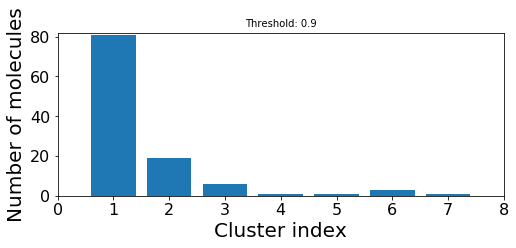

In [134]:
# cluster back pocket I
fps = df_B1.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'B1', cutoff=i)

B2
Threshold:  0.0
total # clusters:  122
# clusters with only 1 compound:  83
# clusters with >5 compounds:  7
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


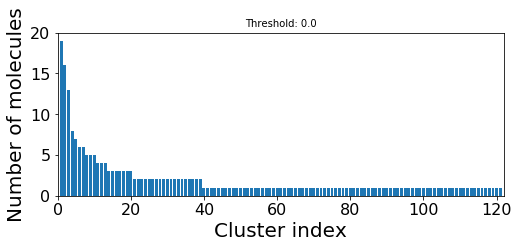

B2
Threshold:  0.1
total # clusters:  119
# clusters with only 1 compound:  79
# clusters with >5 compounds:  7
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


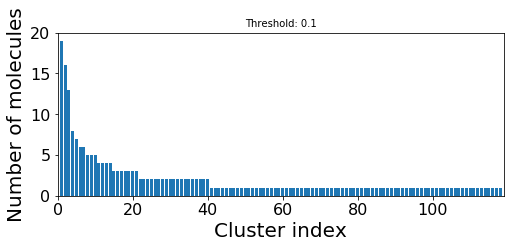

B2
Threshold:  0.2
total # clusters:  113
# clusters with only 1 compound:  71
# clusters with >5 compounds:  8
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


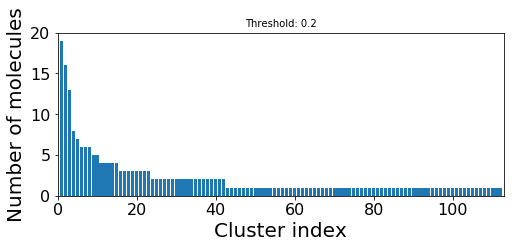

B2
Threshold:  0.30000000000000004
total # clusters:  102
# clusters with only 1 compound:  60
# clusters with >5 compounds:  10
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


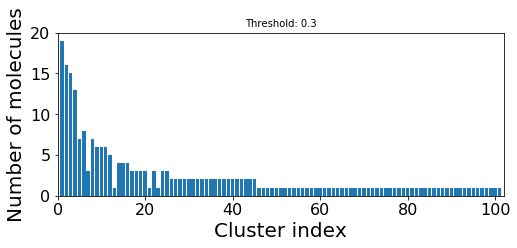

B2
Threshold:  0.4
total # clusters:  87
# clusters with only 1 compound:  43
# clusters with >5 compounds:  10
# clusters with >25 compounds:  0
# clusters with >100 compounds:  0


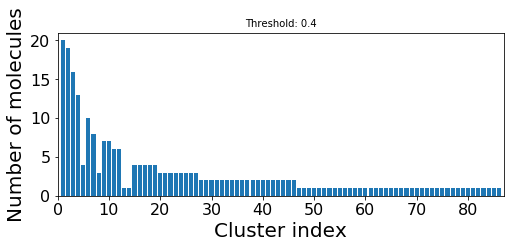

B2
Threshold:  0.5
total # clusters:  73
# clusters with only 1 compound:  33
# clusters with >5 compounds:  10
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


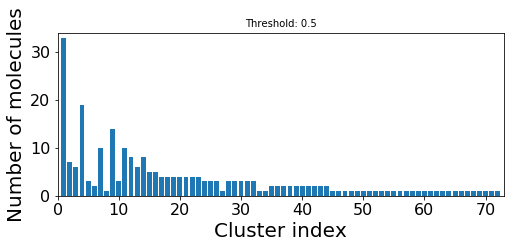

B2
Threshold:  0.6000000000000001
total # clusters:  59
# clusters with only 1 compound:  22
# clusters with >5 compounds:  11
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


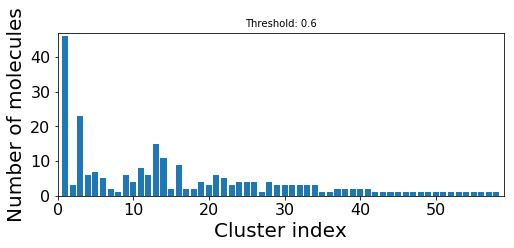

B2
Threshold:  0.7000000000000001
total # clusters:  35
# clusters with only 1 compound:  8
# clusters with >5 compounds:  10
# clusters with >25 compounds:  2
# clusters with >100 compounds:  0


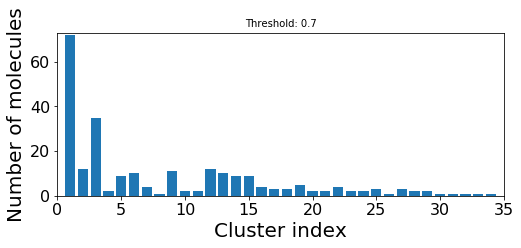

B2
Threshold:  0.8
total # clusters:  24
# clusters with only 1 compound:  8
# clusters with >5 compounds:  8
# clusters with >25 compounds:  2
# clusters with >100 compounds:  1


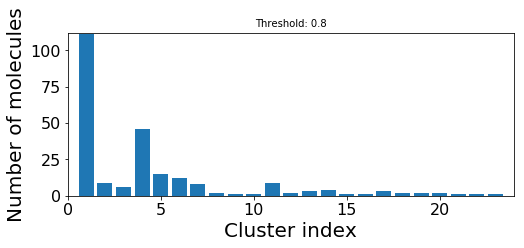

B2
Threshold:  0.9
total # clusters:  10
# clusters with only 1 compound:  3
# clusters with >5 compounds:  6
# clusters with >25 compounds:  1
# clusters with >100 compounds:  1


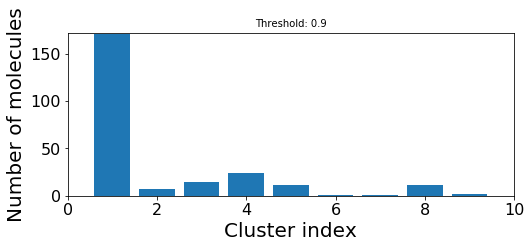

In [135]:
# cluster back pocket II
fps = df_B2.fingerprint
for i in np.arange(0., 1.0, 0.1):
    clusters = ClusterFps(fps, cutoff=i)
    analyze_clusters(clusters, 'B2', cutoff=i)

## Investigate clusters:

In [136]:
def principal_components(X):
    pca = decomposition.PCA(n_components=2)
    pca.fit(X)
    X = pca.transform(X)
    return [p[0] for p in X], [p[1] for p in X]

In [137]:
def find_cluster_mcs(cluster, frags):
    frags = list(frags)
    mols = [frags[i] for i in cluster]
    mcs = rdFMCS.FindMCS(mols, threshold=0.8)
    substructure = Chem.MolFromSmarts(mcs.smartsString)
    return substructure

In [138]:
def cluster_scatter_plots(x, y, clusters, n_clusters, df, subpocket):
    
    X, Y = [], []
    kinases = list(df.group)
    kinasesXY = []
    cluster_colors = []#np.empty(len(points), dtype=object)
    for p, point in enumerate(x):
        for c, cluster in enumerate(clusters[:n_clusters]):
            if p in cluster:
                cluster_colors.append(c)
                X.append(point)
                Y.append(y[p])
                kinasesXY.append(kinases[p])

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.scatter(X, Y, c=cluster_colors, s=20, cmap='brg')
    plt.title(str(n_clusters)+' largest clusters in '+subpocket+' colored by cluster')

    # find kinase colors
    kinase_set = list(set(kinasesXY))
    kinase_colors = []
    for k, kinase in enumerate(kinasesXY):
        kinase_colors.append(kinase_set.index(kinase))

    plt.subplot(1,2,2)
    plt.scatter(X, Y, c=kinase_colors, s=20, cmap='brg')
    plt.title(str(n_clusters)+' largest clusters in '+subpocket+' colored by kinase group')
    plt.show()
    
    return None

## ADENINE POCKET:

AP
Threshold:  0.5
total # clusters:  392
# clusters with only 1 compound:  182
# clusters with >5 compounds:  84
# clusters with >25 compounds:  18
# clusters with >100 compounds:  5


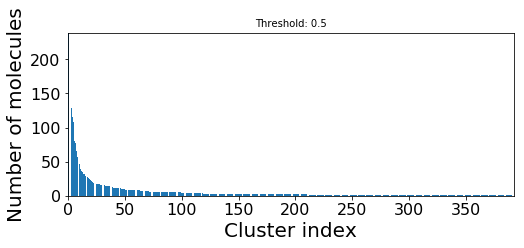

Total number of fragments:  2645


In [139]:
# investigate adenine pocket clusters
cutoff = 0.5
fps = df_AP.fingerprint
frags = df_AP.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)
 
analyze_clusters(clusters, 'AP', cutoff)

print('Total number of fragments: ', len(frags))

In [140]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

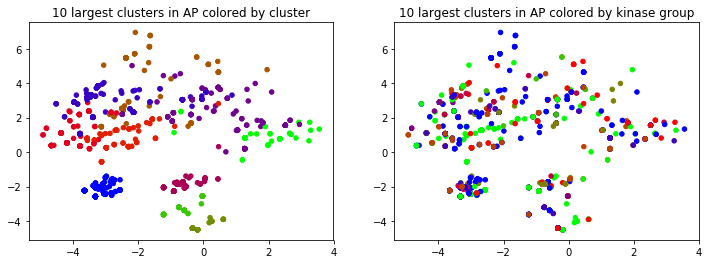

In [141]:
# plot clusters
n_clusters = 10
cluster_scatter_plots(x, y, clusters, n_clusters, df_AP, 'AP')

Maximum common substructure per cluster: 


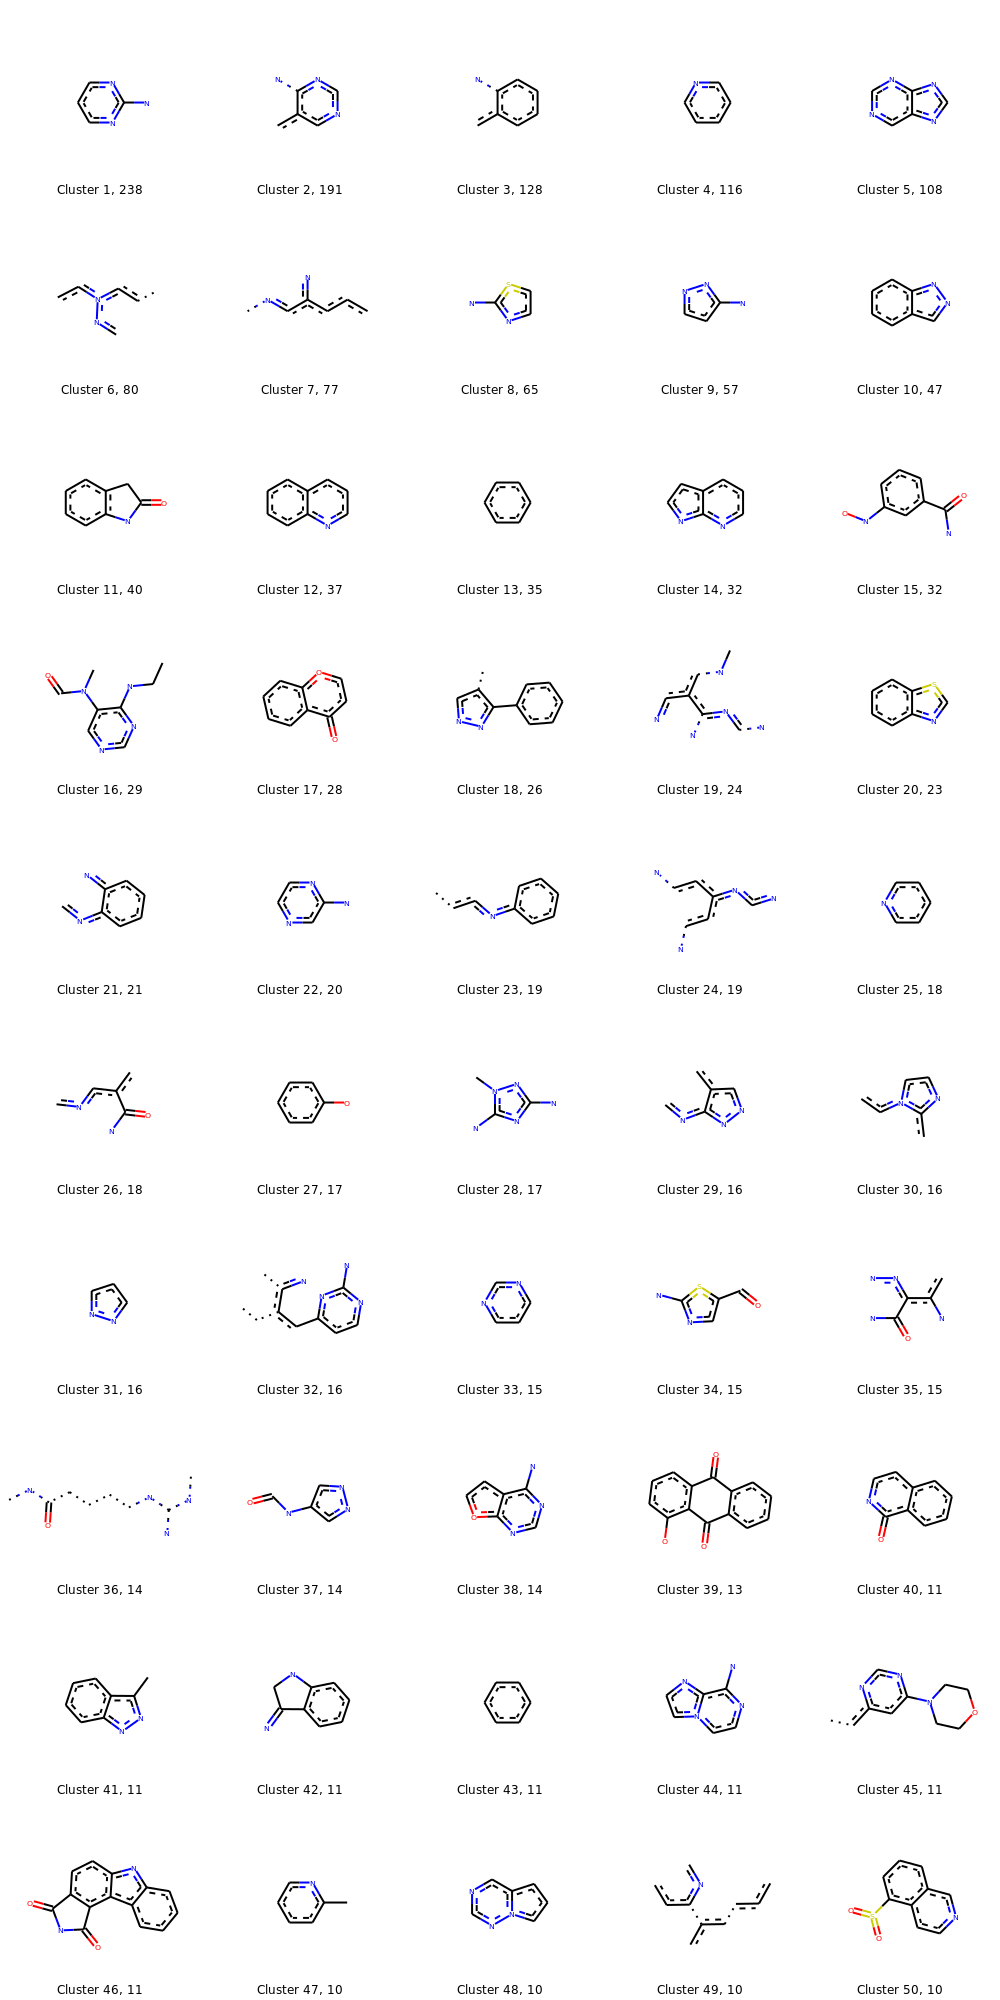

In [142]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:50]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i+1)+', '+str(len(cluster))
    legends.append(legend)
               
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

## FRONT POCKET:

FP
Threshold:  0.5
total # clusters:  306
# clusters with only 1 compound:  136
# clusters with >5 compounds:  62
# clusters with >25 compounds:  13
# clusters with >100 compounds:  2


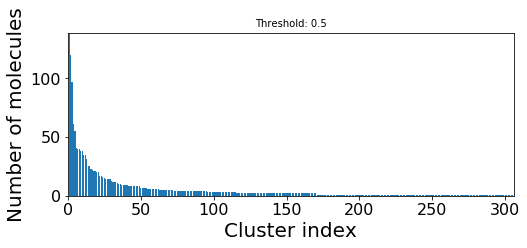

Total number of fragments:  1787


In [143]:
# investigate front pocket
cutoff = 0.5
fps = df_FP.fingerprint
frags = df_FP.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'FP', cutoff)

print('Total number of fragments: ', len(frags))

In [144]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

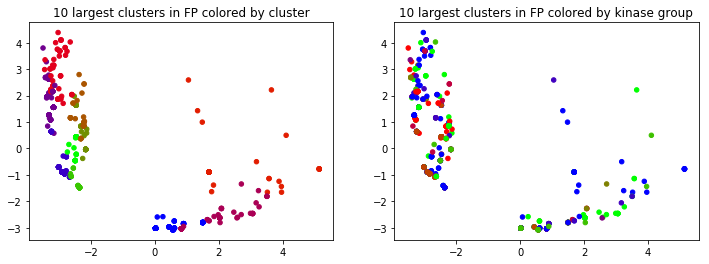

In [145]:
# plot clusters
n_clusters = 10
cluster_scatter_plots(x, y, clusters, n_clusters, df_FP, 'FP')

Maximum common substructure per cluster: 


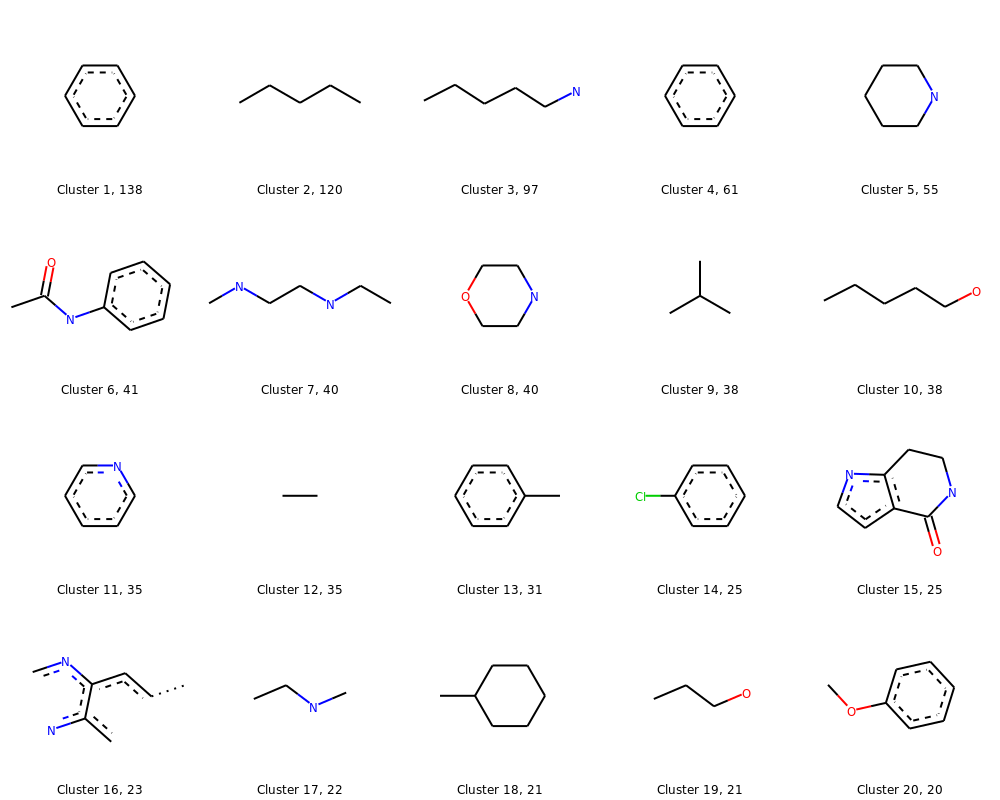

In [146]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:20]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i+1)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

## SE POCKET:

SE
Threshold:  0.5
total # clusters:  213
# clusters with only 1 compound:  90
# clusters with >5 compounds:  43
# clusters with >25 compounds:  14
# clusters with >100 compounds:  2


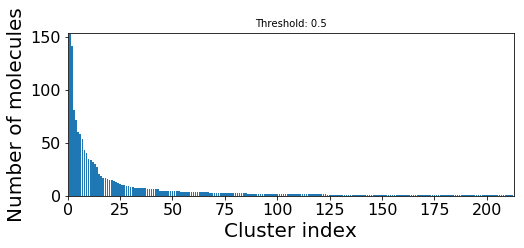

Total number of fragments:  1488


In [147]:
# investigate solvent exposed pocket
cutoff = 0.5
fps = df_SE.fingerprint
frags = df_SE.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'SE', cutoff)

print('Total number of fragments: ', len(frags))

In [148]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

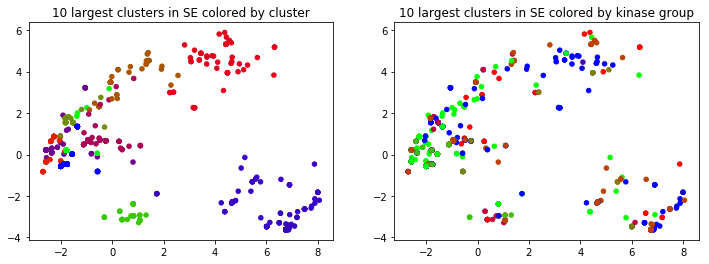

In [149]:
# plot clusters
n_clusters = 10
cluster_scatter_plots(x, y, clusters, n_clusters, df_SE, 'SE')

Maximum common substructure per cluster: 


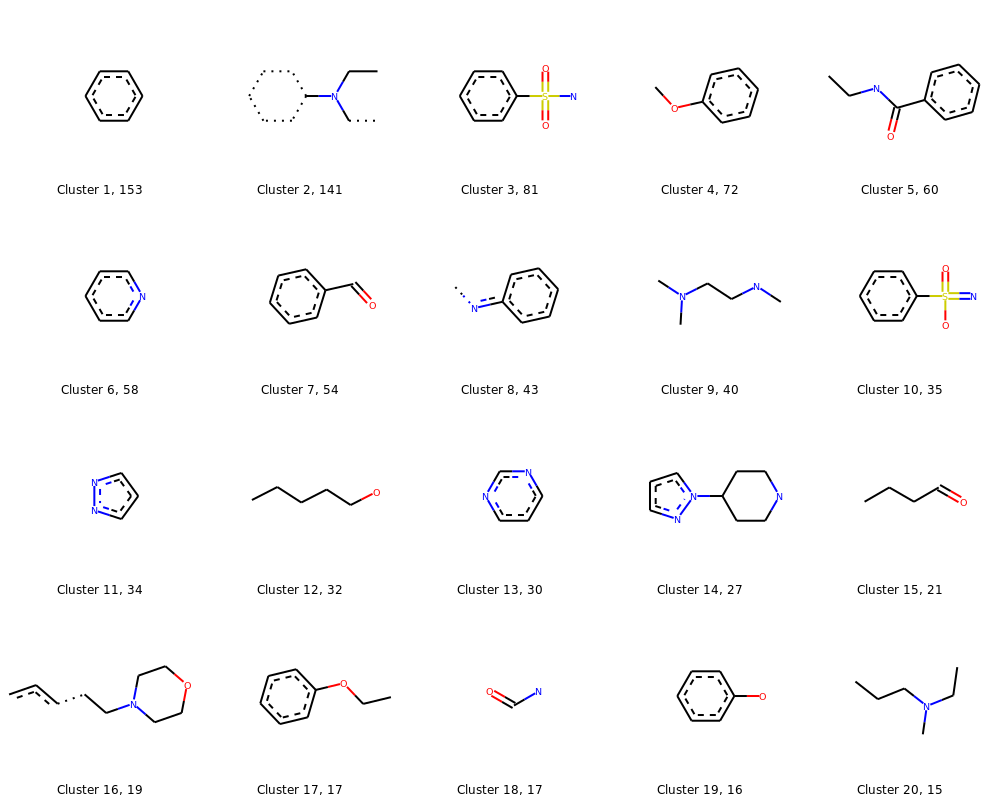

In [150]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:20]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i+1)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

## GATE AREA:

GA
Threshold:  0.5
total # clusters:  180
# clusters with only 1 compound:  85
# clusters with >5 compounds:  36
# clusters with >25 compounds:  12
# clusters with >100 compounds:  1


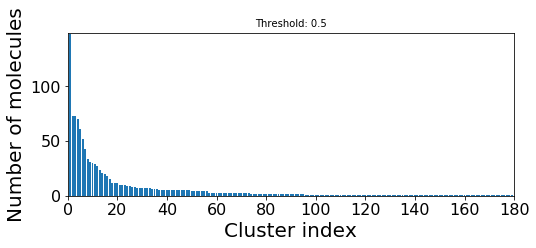

Total number of fragments:  1202


In [151]:
# investigate gate area
cutoff = 0.5
fps = df_GA.fingerprint
frags = df_GA.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'GA', cutoff)
print('Total number of fragments: ', len(frags))

In [152]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

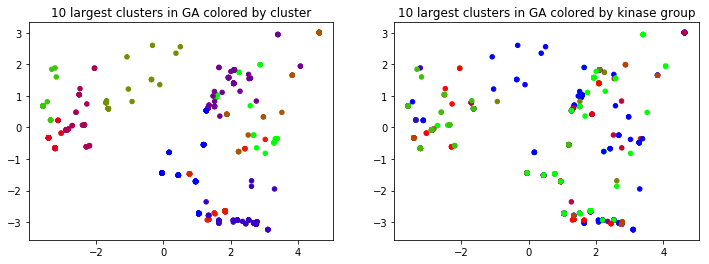

In [153]:
# plot clusters
n_clusters = 10
cluster_scatter_plots(x, y, clusters, n_clusters, df_GA, 'GA')

Maximum common substructure per cluster: 


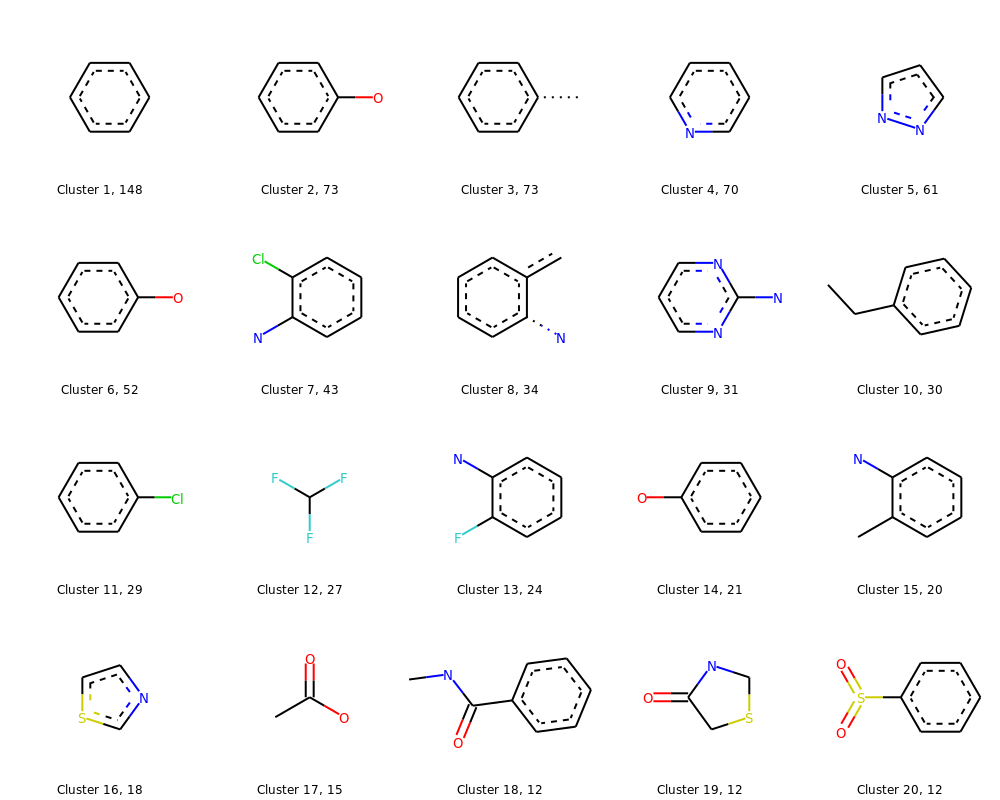

In [154]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:20]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i+1)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

## BACK POCKET I

B1
Threshold:  0.5
total # clusters:  33
# clusters with only 1 compound:  18
# clusters with >5 compounds:  5
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


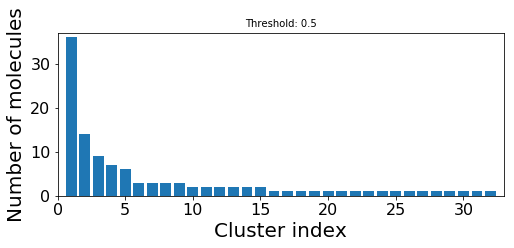

Total number of fragments:  244


In [155]:
# investigate back pocket I
cutoff = 0.5
fps = df_B1.fingerprint
frags = df_B2.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'B1', cutoff)
print('Total number of fragments: ', len(frags))

In [156]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

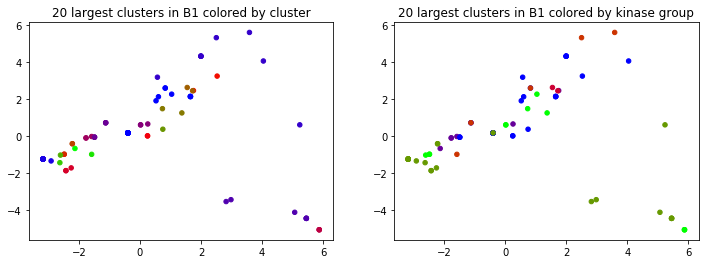

In [157]:
# plot clusters
n_clusters = 20
cluster_scatter_plots(x, y, clusters, n_clusters, df_B1, 'B1')

Maximum common substructure per cluster: 


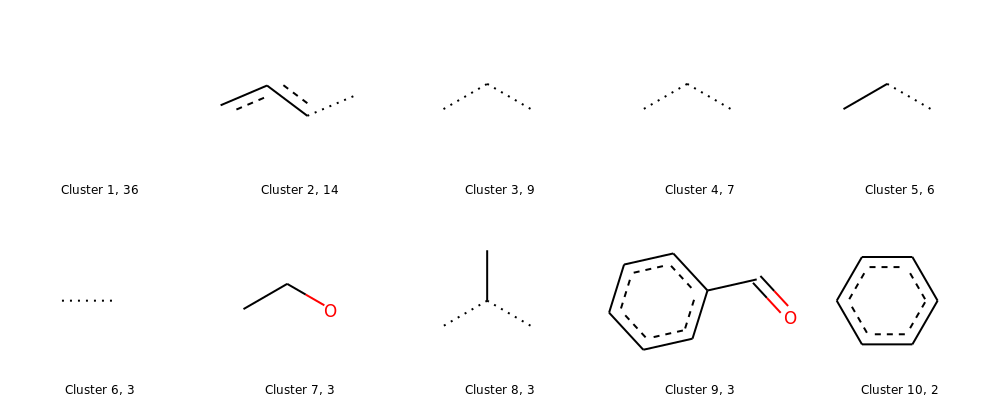

In [158]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:10]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i+1)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)

## BACK POCKET II

B2
Threshold:  0.5
total # clusters:  73
# clusters with only 1 compound:  33
# clusters with >5 compounds:  10
# clusters with >25 compounds:  1
# clusters with >100 compounds:  0


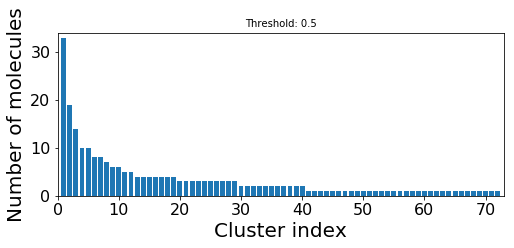

Total number of fragments:  244


In [159]:
# investigate back pocket II
cutoff = 0.5
fps = df_B2.fingerprint
frags = df_B2.fragment

clusters = ClusterFps(fps, cutoff=cutoff)
# sort clusters by size
clusters = sorted(clusters, key=len, reverse=True)

analyze_clusters(clusters, 'B2', cutoff)
print('Total number of fragments: ', len(frags))

In [160]:
# convert the RDKit explicit vectors into numpy arrays
np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)

# PCA
x, y = principal_components(np_fps)

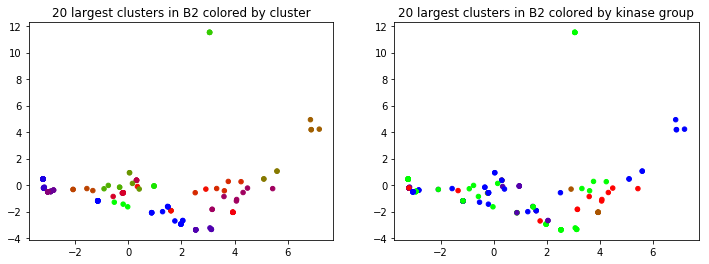

In [161]:
# plot clusters
n_clusters = 20
cluster_scatter_plots(x, y, clusters, n_clusters, df_B2, 'B2')

Maximum common substructure per cluster: 


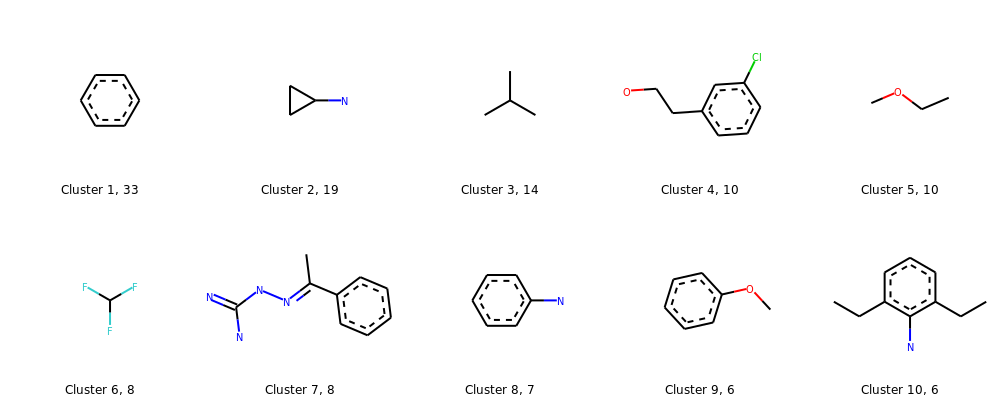

In [162]:
substructures = []
legends = []
# plot MCS for largest clusters
for i, cluster in enumerate(clusters[:10]):
    mcs = find_cluster_mcs(cluster, frags)
    substructures.append(mcs)
    legend = 'Cluster '+str(i+1)+', '+str(len(cluster))
    legends.append(legend)
        
print('Maximum common substructure per cluster: ') 
Draw.MolsToGridImage(substructures, legends=legends, molsPerRow=5)